# Assignment 4
## Econ 8310 - Business Forecasting

This assignment will make use of the bayesian statistical models covered in Lessons 10 to 12. 

A/B Testing is a critical concept in data science, and for many companies one of the most relevant applications of data-driven decision-making. In order to improve product offerings, marketing campaigns, user interfaces, and many other user-facing interactions, scientists and engineers create experiments to determine the efficacy of proposed changes. Users are then randomly assigned to either the treatment or control group, and their behavior is recorded.
If the changes that the treatment group is exposed to can be measured to have a benefit in the metric of interest, then those changes are scaled up and rolled out to across all interactions.
Below is a short video detailing the A/B Testing process, in case you want to learn a bit more:
[https://youtu.be/DUNk4GPZ9bw](https://youtu.be/DUNk4GPZ9bw)

For this assignment, you will use an A/B test data set, which was pulled from the Kaggle website (https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing). I have added the data from the page into Codio for you. It can be found in the cookie_cats.csv file in the file tree. It can also be found at [https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv](https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv)

The variables are defined as follows:

| Variable Name  | Definition |
|----------------|----|
| userid         | A unique number that identifies each player  |
| version        | Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40) |
| sum_gamerounds | The number of game rounds played by the player during the first 14 days after install.  |
| retention1     | Did the player come back and play 1 day after installing?     |
| retention7     | Did the player come back and play 7 days after installing?    |               

### The questions

You will be asked to answer the following questions in a small quiz on Canvas:
1. What was the effect of moving the gate from level 30 to level 40 on 1-day retention rates?
2. What was the effect of moving the gate from level 30 to level 40 on 7-day retention rates?
3. What was the biggest challenge for you in completing this assignment?

You will also be asked to submit a URL to your forked GitHub repository containing your code used to answer these questions.

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 347 kB 14.5 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 15.7 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 12.0 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/dustywhite7/Econ8310/master/AssignmentData/cookie_cats.csv"
data = pd.read_csv(url)
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
data.tail()

,userid,version,sum_gamerounds,retention_1,retention_7
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False
90188,9999861,gate_40,16,False,False


In [3]:
# Count and display the number of unique players
print("Number of players: \n", data.userid.nunique(), '\n',
        "Number of records: \n", len(data.userid),'\n')

Number of players: 
 90189 
 Number of records: 
 90189 



In [5]:
data.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [6]:
data.dtypes

userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

In [7]:
def na_counter(data):
    print("NaN Values per column:")
    print("NA")
    for i in data.columns:
        percentage = 100 - ((len(data[i]) - data[i].isna().sum())/len(data[i]))*100

        # Only return columns with more than 5% of NA values
        if percentage > 5:
            print(i+" has "+ str(round(percentage)) +"% of Null Values")
        else:
            continue

# Execute function
na_counter(data)

NaN Values per column:
NA


In [8]:
# Convert boolean to integer (optional but useful for calculations)
data['retention_1'] = data['retention_1'].astype(int)
data['retention_7'] = data['retention_7'].astype(int)

# Check average retention by group
ret1 = data.groupby('version')['retention_1'].mean()
ret7 = data.groupby('version')['retention_7'].mean()

print("1-day Retention Rate:\n", ret1)
print("7-day Retention Rate:\n", ret7)

1-day Retention Rate:
 version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64
7-day Retention Rate:
 version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64


In [9]:
data['retention_1'] = data['retention_1'].astype(int)
ret1 = data.groupby('version')['retention_1'].mean()
print("1-day Retention Rate:\n", ret1)

1-day Retention Rate:
 version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64


In [10]:
data['retention_7'] = data['retention_7'].astype(int)
ret7 = data.groupby('version')['retention_7'].mean()
print("7-day Retention Rate:\n", ret7)

7-day Retention Rate:
 version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64


In [11]:

grouped = data.groupby('version')[['retention_1', 'retention_7']].mean()
print(grouped)

         retention_1  retention_7
version                          
gate_30     0.448188     0.190201
gate_40     0.442283     0.182000


In [17]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 12.7 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 6.9 MB/s  eta 0:00:01
     |████████████████████████████████| 3.0 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 13.9 MB/s eta 0:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


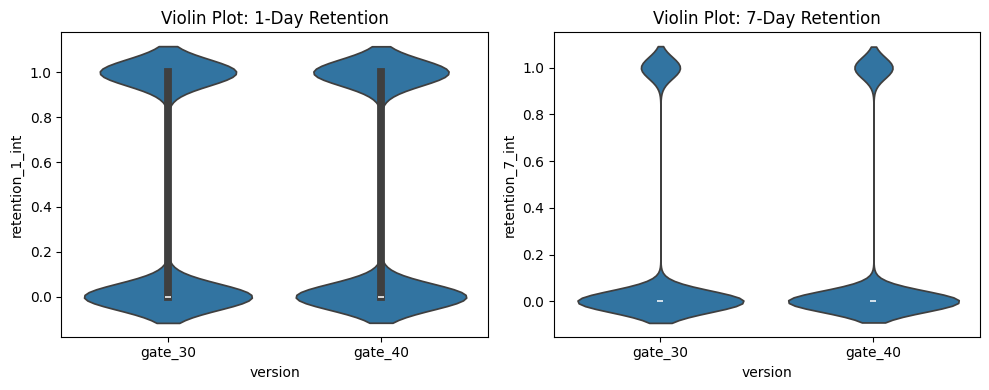

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Convert boolean to int for plotting
data['retention_1_int'] = data['retention_1'].astype(int)
data['retention_7_int'] = data['retention_7'].astype(int)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.violinplot(x='version', y='retention_1_int', data=data)
plt.title('Violin Plot: 1-Day Retention')

plt.subplot(1,2,2)
sns.violinplot(x='version', y='retention_7_int', data=data)
plt.title('Violin Plot: 7-Day Retention')
plt.tight_layout()
plt.show()

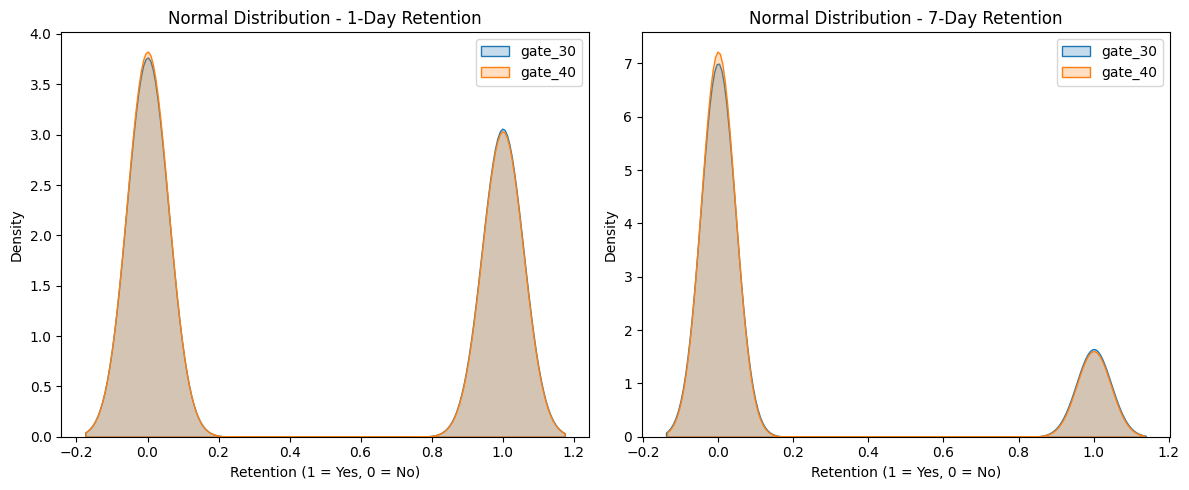

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# 1-Day Retention KDE Plot
plt.subplot(1, 2, 1)
sns.kdeplot(data=data[data['version'] == 'gate_30']['retention_1'], label='gate_30', fill=True)
sns.kdeplot(data=data[data['version'] == 'gate_40']['retention_1'], label='gate_40', fill=True)
plt.title("Normal Distribution - 1-Day Retention")
plt.xlabel("Retention (1 = Yes, 0 = No)")
plt.legend()

# 7-Day Retention KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=data[data['version'] == 'gate_30']['retention_7'], label='gate_30', fill=True)
sns.kdeplot(data=data[data['version'] == 'gate_40']['retention_7'], label='gate_40', fill=True)
plt.title("Normal Distribution - 7-Day Retention")
plt.xlabel("Retention (1 = Yes, 0 = No)")
plt.legend()

plt.tight_layout()
plt.show()

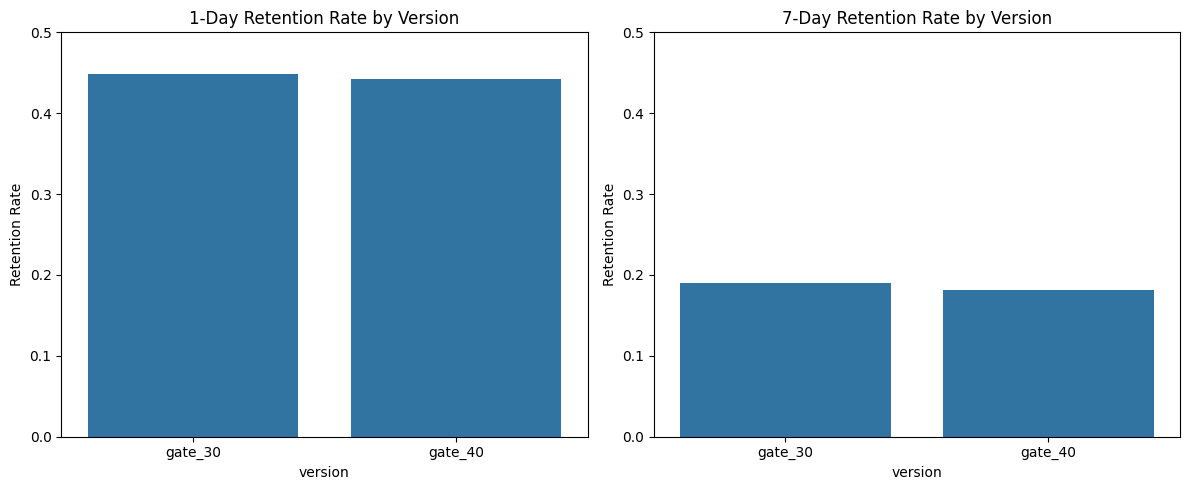

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ret1 = data.groupby("version", as_index=False)['retention_1'].mean()
ret7 = data.groupby("version", as_index=False)['retention_7'].mean()

plt.figure(figsize=(12, 5))

# 1-day retention
plt.subplot(1, 2, 1)
sns.barplot(data=ret1, x='version', y='retention_1')
plt.title("1-Day Retention Rate by Version")
plt.ylabel("Retention Rate")
plt.ylim(0, 0.5)

# 7-day retention
plt.subplot(1, 2, 2)
sns.barplot(data=ret7, x='version', y='retention_7')
plt.title("7-Day Retention Rate by Version")
plt.ylabel("Retention Rate")
plt.ylim(0, 0.5)

plt.tight_layout()
plt.show()
